In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## One Attribute Group

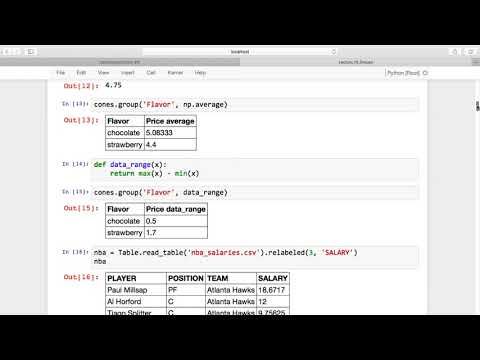

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('n0jAwei6zGY', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
all_cones = Table.read_table('cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [3]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [4]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.55, 5.25]"


In [5]:
cones.group('Flavor', len)

Flavor,Price len
chocolate,3
strawberry,2


In [6]:
cones.group('Flavor', min)

Flavor,Price min
chocolate,4.75
strawberry,3.55


In [7]:
min(cones.where('Flavor', 'chocolate').column('Price'))

4.75

In [8]:
cones.group('Flavor', np.average)

Flavor,Price average
chocolate,5.08333
strawberry,4.4


In [9]:
def data_range(x):
    return max(x) - min(x)

In [10]:
cones.group('Flavor', data_range)

Flavor,Price data_range
chocolate,0.5
strawberry,1.7


In [11]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [12]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY sum
Cleveland Cavaliers,102.312
Oklahoma City Thunder,96.8322
Golden State Warriors,94.0851
Memphis Grizzlies,93.7964
Washington Wizards,90.0475
Houston Rockets,85.2858
San Antonio Spurs,84.6521
Charlotte Hornets,84.1024
Miami Heat,81.5287
New Orleans Pelicans,80.5146


In [13]:
nba.group('TEAM', sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


In [14]:
position_and_money = nba.select('POSITION', 'SALARY')
position_and_money.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [15]:
position_and_money.group('POSITION', np.average)

POSITION,SALARY average
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


## Cross Classification

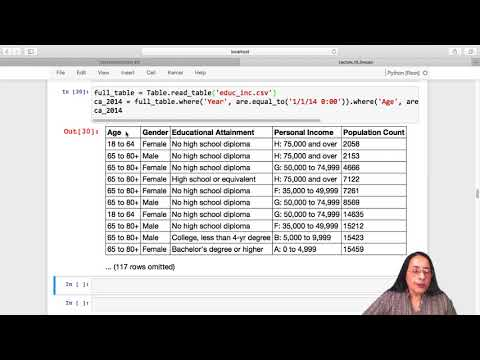

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('9NGa2MaDPxw', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [16]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [17]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [18]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [19]:
all_cones.group(['Flavor', 'Color'], max)

Flavor,Color,Price max
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,5.25


In [20]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [21]:
nba.drop(0).group(['TEAM', 'POSITION'], np.average)

TEAM,POSITION,SALARY average
Atlanta Hawks,C,7.58542
Atlanta Hawks,PF,11.0025
Atlanta Hawks,PG,4.8817
Atlanta Hawks,SF,3
Atlanta Hawks,SG,1.80969
Boston Celtics,C,2.45046
Boston Celtics,PF,3.08548
Boston Celtics,PG,4.97465
Boston Celtics,SF,4.41716
Boston Celtics,SG,2.00755


In [22]:
nba.drop(0, 2).group('POSITION', np.average)

POSITION,SALARY average
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [23]:
full_table = Table.read_table('educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17')).drop(0).sort('Population Count')
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [24]:
no_ages = ca_2014.drop(0)
no_ages

Gender,Educational Attainment,Personal Income,Population Count
Female,No high school diploma,"H: 75,000 and over",2058
Male,No high school diploma,"H: 75,000 and over",2153
Female,No high school diploma,"G: 50,000 to 74,999",4666
Female,High school or equivalent,"H: 75,000 and over",7122
Female,No high school diploma,"F: 35,000 to 49,999",7261
Male,No high school diploma,"G: 50,000 to 74,999",8569
Female,No high school diploma,"G: 50,000 to 74,999",14635
Male,No high school diploma,"F: 35,000 to 49,999",15212
Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [25]:
no_ages.group([0, 1, 2], sum)

Gender,Educational Attainment,Personal Income,Population Count sum
Female,Bachelor's degree or higher,"A: 0 to 4,999",374723
Female,Bachelor's degree or higher,"B: 5,000 to 9,999",211446
Female,Bachelor's degree or higher,"C: 10,000 to 14,999",311524
Female,Bachelor's degree or higher,"D: 15,000 to 24,999",435732
Female,Bachelor's degree or higher,"E: 25,000 to 34,999",400218
Female,Bachelor's degree or higher,"F: 35,000 to 49,999",644603
Female,Bachelor's degree or higher,"G: 50,000 to 74,999",757705
Female,Bachelor's degree or higher,"H: 75,000 and over",1063291
Female,"College, less than 4-yr degree","A: 0 to 4,999",614511
Female,"College, less than 4-yr degree","B: 5,000 to 9,999",540089


## Example 1: NBA Salaries with group

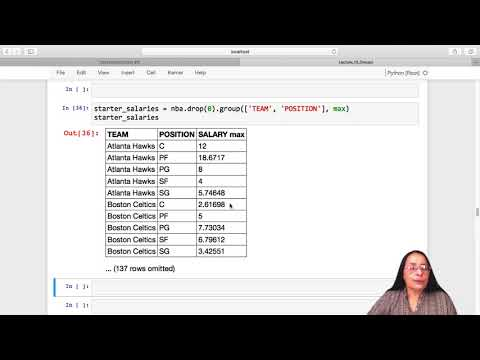

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('8MZW99WJcXs', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [26]:
starter_salaries = nba.drop(0).group(['TEAM', 'POSITION'], max)
starter_salaries

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


In [27]:
starter_salaries.drop(1).group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


## Pivot Tables

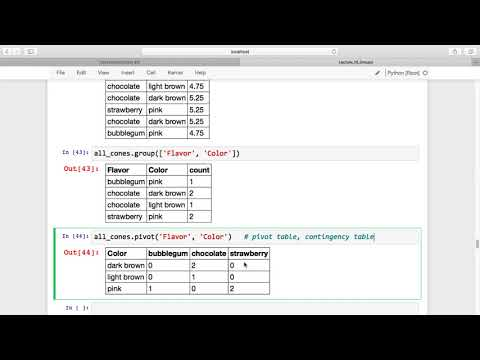

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('JSgaMnExiCY', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [28]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [29]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [30]:
all_cones.pivot('Flavor', 'Color')   # pivot table, contingency table

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [31]:
all_cones.pivot('Color', 'Flavor')

Flavor,dark brown,light brown,pink
bubblegum,0,0,1
chocolate,2,1,0
strawberry,0,0,2


In [32]:
all_cones.pivot('Color', 'Flavor', values = 'Price', collect = max)

Flavor,dark brown,light brown,pink
bubblegum,0,0,4.75
chocolate,5.25,4.75,0
strawberry,0,0,5.25


In [33]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [34]:
nba.drop(0).group(['TEAM', 'POSITION'], np.average)

TEAM,POSITION,SALARY average
Atlanta Hawks,C,7.58542
Atlanta Hawks,PF,11.0025
Atlanta Hawks,PG,4.8817
Atlanta Hawks,SF,3
Atlanta Hawks,SG,1.80969
Boston Celtics,C,2.45046
Boston Celtics,PF,3.08548
Boston Celtics,PG,4.97465
Boston Celtics,SF,4.41716
Boston Celtics,SG,2.00755


In [44]:
np.average(nba.where("TEAM", are.equal_to('Atlanta Hawks')).where("POSITION", are.equal_to('C')).column(3))

7.585416666666667

In [38]:
nba.pivot("POSITION", "TEAM")

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [35]:
nba.pivot('POSITION', 'TEAM', 'SALARY', np.average)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,7.58542,11.0025,4.8817,3,1.80969
Boston Celtics,2.45046,3.08548,4.97465,4.41716,2.00755
Brooklyn Nets,1.3629,4.45251,3.9,13.0403,1.74118
Charlotte Hornets,6.77224,4.68577,4.4853,3.76642,4.04238
Chicago Bulls,10.4244,3.46744,11.1715,1.95816,6.19447
Cleveland Cavaliers,7.75234,19.689,6.55159,22.9705,8.98876
Dallas Mavericks,3.23548,11.9135,4.41818,15.3615,1.21517
Denver Nuggets,2.6163,7.02498,3.72362,7.19577,0.841949
Detroit Pistons,4.0907,0,13.913,1.71622,4.58088
Golden State Warriors,6.54125,7.18637,8.45726,4.49669,9.0005


## Example 2: NBA Salaries with pivot

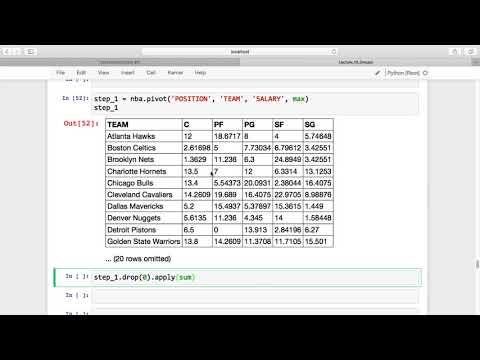

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('e2Bs4SfIBUA', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [36]:
step_1 = nba.pivot('POSITION', 'TEAM', 'SALARY', max)
step_1

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501


In [37]:
totals = step_1.drop(0).apply(sum)
step_1.with_columns('TOTAL', totals).sort(6, descending=True)

TEAM,C,PF,PG,SF,SG,TOTAL
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876,82.3166
Oklahoma City Thunder,16.4075,12.25,16.7442,20.1586,5.13843,70.6988
Miami Heat,0,22.1927,14.783,10.1516,20,67.1273
San Antonio Spurs,7.5,19.689,13.4375,16.4075,10,67.034
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501,66.6431
Houston Rockets,22.3594,2.48953,12.4045,8.19303,15.7564,61.2029
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075,57.8247
Los Angeles Lakers,15.5922,3.13224,5.10312,25,7,55.8276
New York Knicks,12.65,4.13172,7.40281,22.875,8,55.0595
Memphis Grizzlies,19.688,9.63856,9.58843,9.45,5.15854,53.5235


## Comparing Distributions

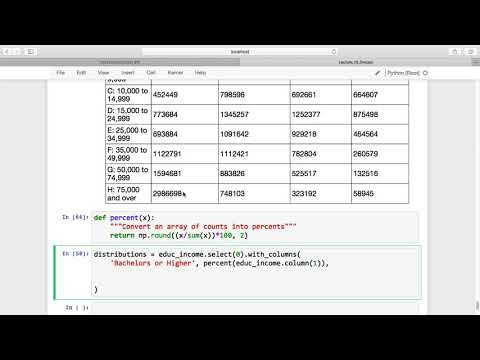

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('YqN8OYt8Upw', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [45]:
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [46]:
educ_income = ca_2014.pivot(2, 3, 4, sum)
educ_income

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [47]:
def percent(x):
    """Convert an array of counts into percents"""
    return np.round((x / sum(x)) * 100, 2)

In [48]:
distributions = educ_income.select(0).with_columns(
    'Bachelors or Higher', percent(educ_income.column(1)),
    'High School', percent(educ_income.column(2))
)
distributions

Personal Income,Bachelors or Higher,High School
"A: 0 to 4,999",6.75,12.67
"B: 5,000 to 9,999",3.82,10.43
"C: 10,000 to 14,999",5.31,10.27
"D: 15,000 to 24,999",9.07,17.3
"E: 25,000 to 34,999",8.14,14.04
"F: 35,000 to 49,999",13.17,14.31
"G: 50,000 to 74,999",18.7,11.37
"H: 75,000 and over",35.03,9.62


In [49]:
sum(distributions.column(1))

99.99000000000001

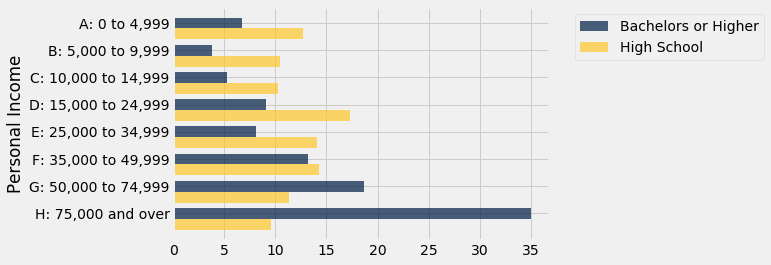

In [50]:
distributions.barh(0)